OASIS INFOBYTE INTERNSHIP 

LEVEL-1:- TASK 4

Project Name - Sentiment Analysis

Intern - Swathi Bonagiri

Domain - Data Analytics

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [50]:
df = pd.read_csv("C:/Users/swath/Downloads/Sentiment_Analysis-4/Twitter_Data.csv")
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [51]:
print("Dataset Shape:", df.shape)
print(df.info())
print(df.isnull().sum())

Dataset Shape: (162980, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
clean_text    4
category      7
dtype: int64


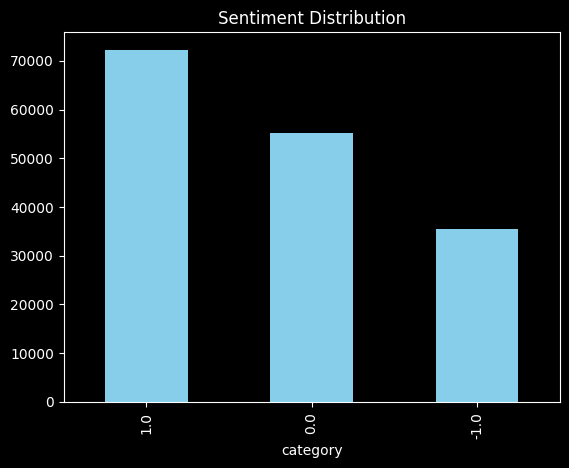

In [52]:
plt.style.use("dark_background")
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution')
plt.show()

In [56]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing Function
def preprocess_text(text):
    if isinstance(text, str):  # Check if text is string
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return " ".join(tokens)
    else:
        return ""  # Return empty string if not text

# Apply Function
df['processed_tweet'] = df['clean_text'].apply(preprocess_text)

df.head()


,clean_text,category,processed_tweet
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


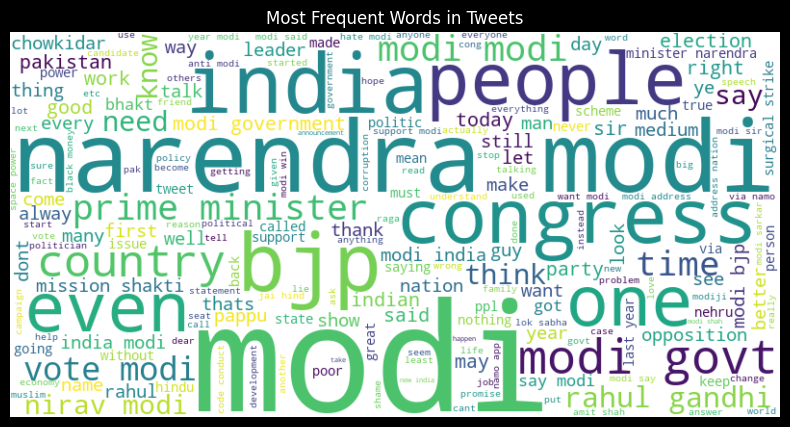

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


all_words = ' '.join(df['processed_tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Tweets')
plt.show()


In [60]:
from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'


df['Sentiment'] = df['processed_tweet'].apply(get_sentiment)


print(df[['processed_tweet', 'Sentiment']].head())


                                     processed_tweet Sentiment
0  modi promised minimum government maximum gover...  Negative
1             talk nonsense continue drama vote modi   Neutral
2  say vote modi welcome bjp told rahul main camp...  Positive
3  asking supporter prefix chowkidar name modi gr...  Positive
4  answer among powerful world leader today trump...  Positive


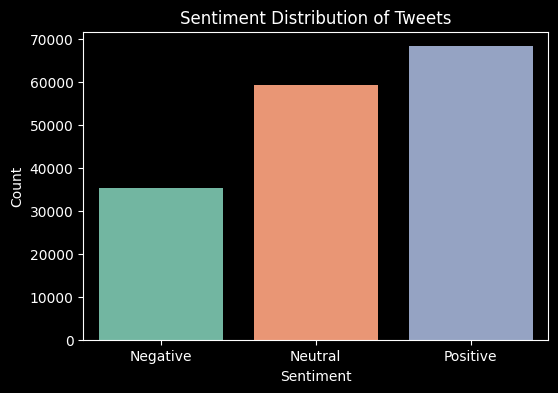

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
sns.countplot(x='Sentiment', data=df, palette='Set2')

plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [29]:
df.to_csv('final_sentiment_analysis_output.csv', index=False)

print("Sentiment Analysis Completed and Output File Saved Successfully!")


Sentiment Analysis Completed and Output File Saved Successfully!


In [30]:
sentiment_counts = df['Sentiment'].value_counts()

print("Sentiment Counts in the Dataset:")
print(sentiment_counts)


Sentiment Counts in the Dataset:
Sentiment
Positive    68288
Neutral     59414
Negative    35278
Name: count, dtype: int64


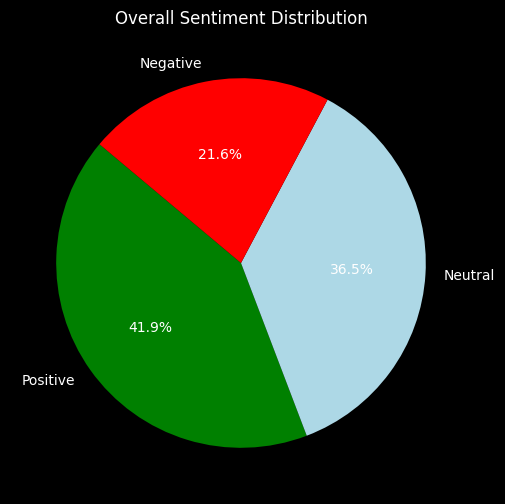

In [35]:
plt.figure(figsize=(6, 6))
colors = ['green', 'lightblue', 'red']

plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Overall Sentiment Distribution')
plt.show()
